In [12]:
%load_ext nb_black

<IPython.core.display.Javascript object>

In [17]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from graspy.plot import heatmap
from graspy.utils import symmetrize
from scipy.stats import ttest_ind, wilcoxon, mannwhitneyu, multiscale_graphcorr

%matplotlib inline

<IPython.core.display.Javascript object>

In [23]:
res_df = pd.read_csv("./results/20200213_correct_nodes.csv")
res_df = res_df.sort_values(by=["m", "delta"])
res_df = res_df[res_df.delta != 0]

<IPython.core.display.Javascript object>

In [24]:
res_df.head()

,m,p,delta,omni_correct_nodes_1_2,omni_correct_nodes_2_2,omni_correct_nodes_1_3,omni_correct_nodes_2_3,omni_correct_nodes_1_4,omni_correct_nodes_2_4,omni_correct_nodes_1_5,...,mase_correct_nodes_2_10,mase_ari_2,mase_ari_3,mase_ari_4,mase_ari_5,mase_ari_6,mase_ari_7,mase_ari_8,mase_ari_9,mase_ari_10
255,5.0,0.5,0.01,0.6512,0.6596,0.5340,0.5328,0.4444,0.4340,0.3820,...,0.2424,0.002228,-0.000177,0.001359,0.001463,0.000953,0.000915,0.001511,0.000883,0.001905
510,5.0,0.5,0.02,0.6608,0.6588,0.5284,0.5164,0.4412,0.4332,0.3804,...,0.2356,0.001293,-0.000735,0.000361,0.001327,-0.000078,-0.000557,0.000400,-0.000149,0.000939
765,5.0,0.5,0.03,0.6416,0.6368,0.5272,0.5276,0.4296,0.4268,0.3564,...,0.2396,0.003784,-0.000297,0.003853,0.000503,0.001430,0.003902,0.003061,0.001483,0.000500
1020,5.0,0.5,0.04,0.6420,0.6532,0.5200,0.5168,0.4348,0.4292,0.3760,...,0.2364,0.002071,0.002594,0.000957,-0.000121,0.002625,0.001281,0.002135,0.000268,0.001034
1275,5.0,0.5,0.05,0.6280,0.6448,0.5512,0.5348,0.4360,0.4292,0.3756,...,0.2328,0.001392,0.002519,0.002530,0.001191,0.002559,0.003228,0.001947,-0.000179,0.000437


<IPython.core.display.Javascript object>

In [15]:
block_1 = 25  # different probability
block_2 = 25
n_clusters = range(2, 11)
p = 0.5
reps = 100
spacing = 50
deltas = np.linspace(0, 1 - p, spacing + 1)
ms = np.linspace(0, 250, spacing + 1)[1:]

<IPython.core.display.Javascript object>

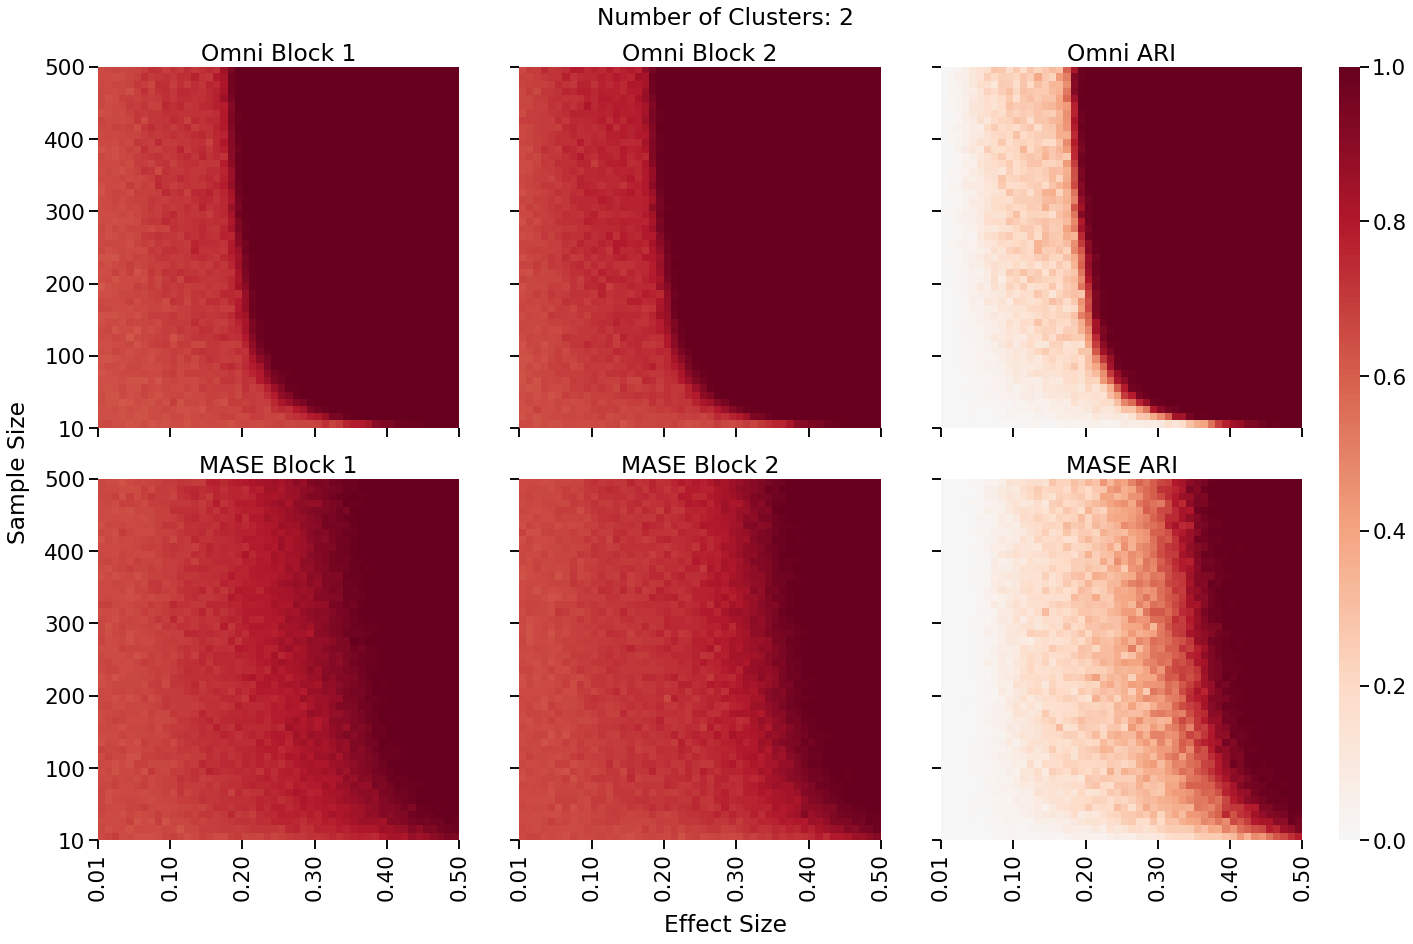

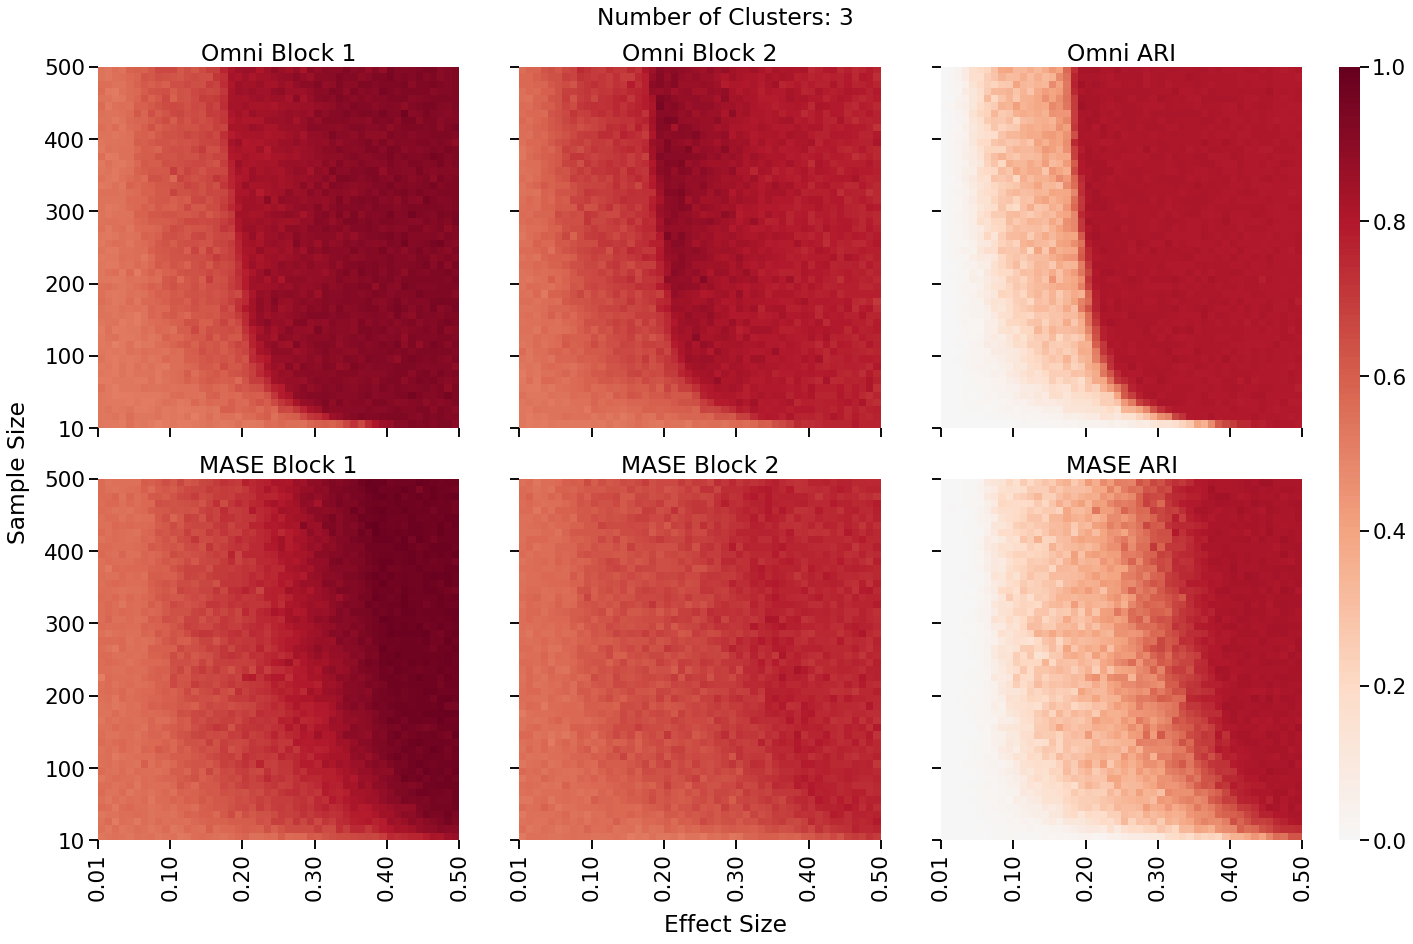

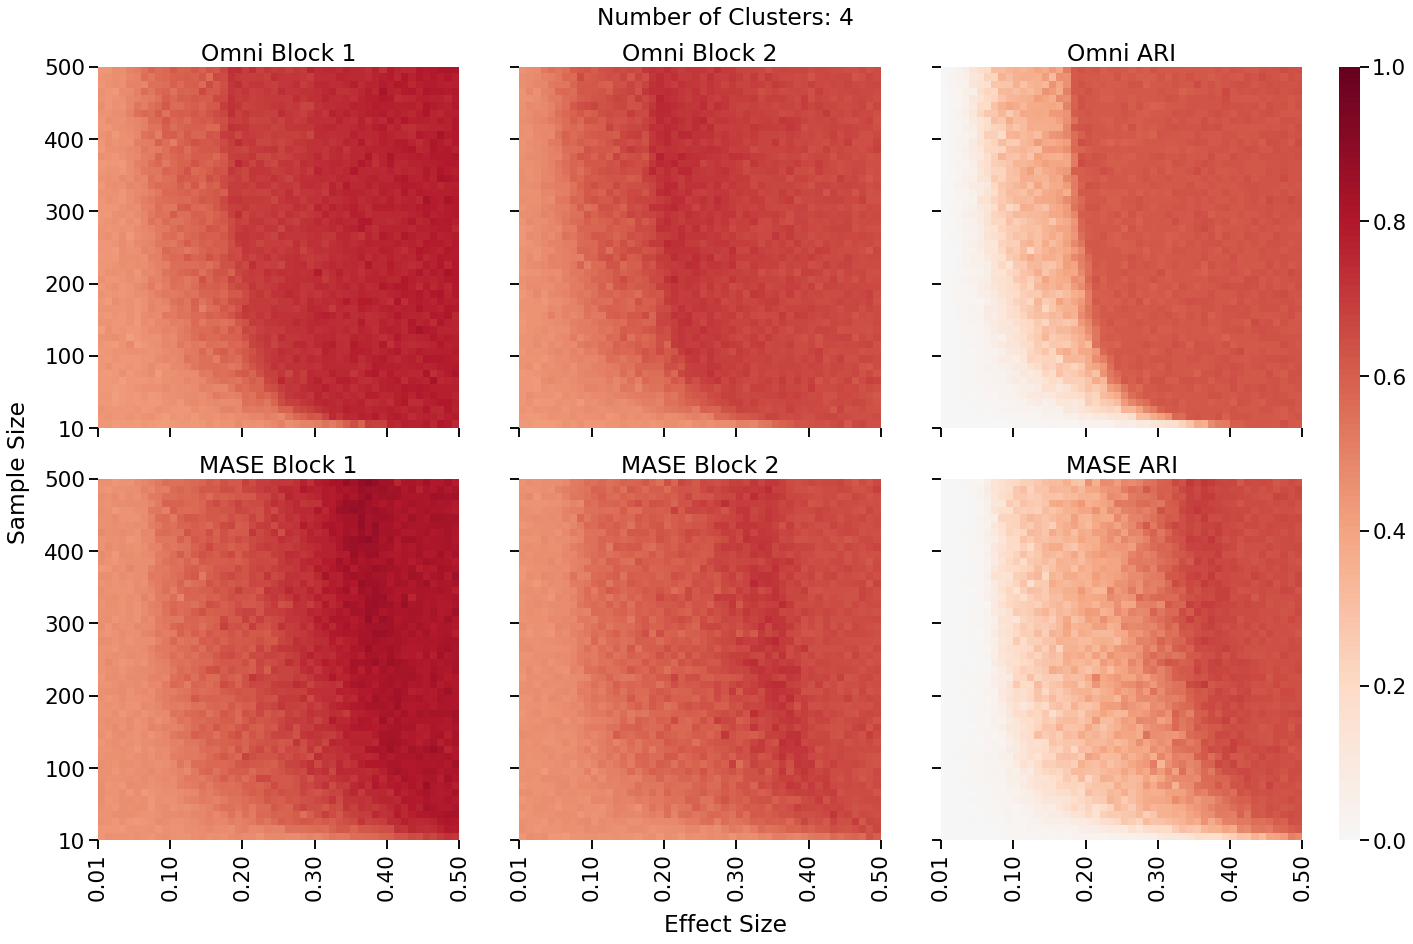

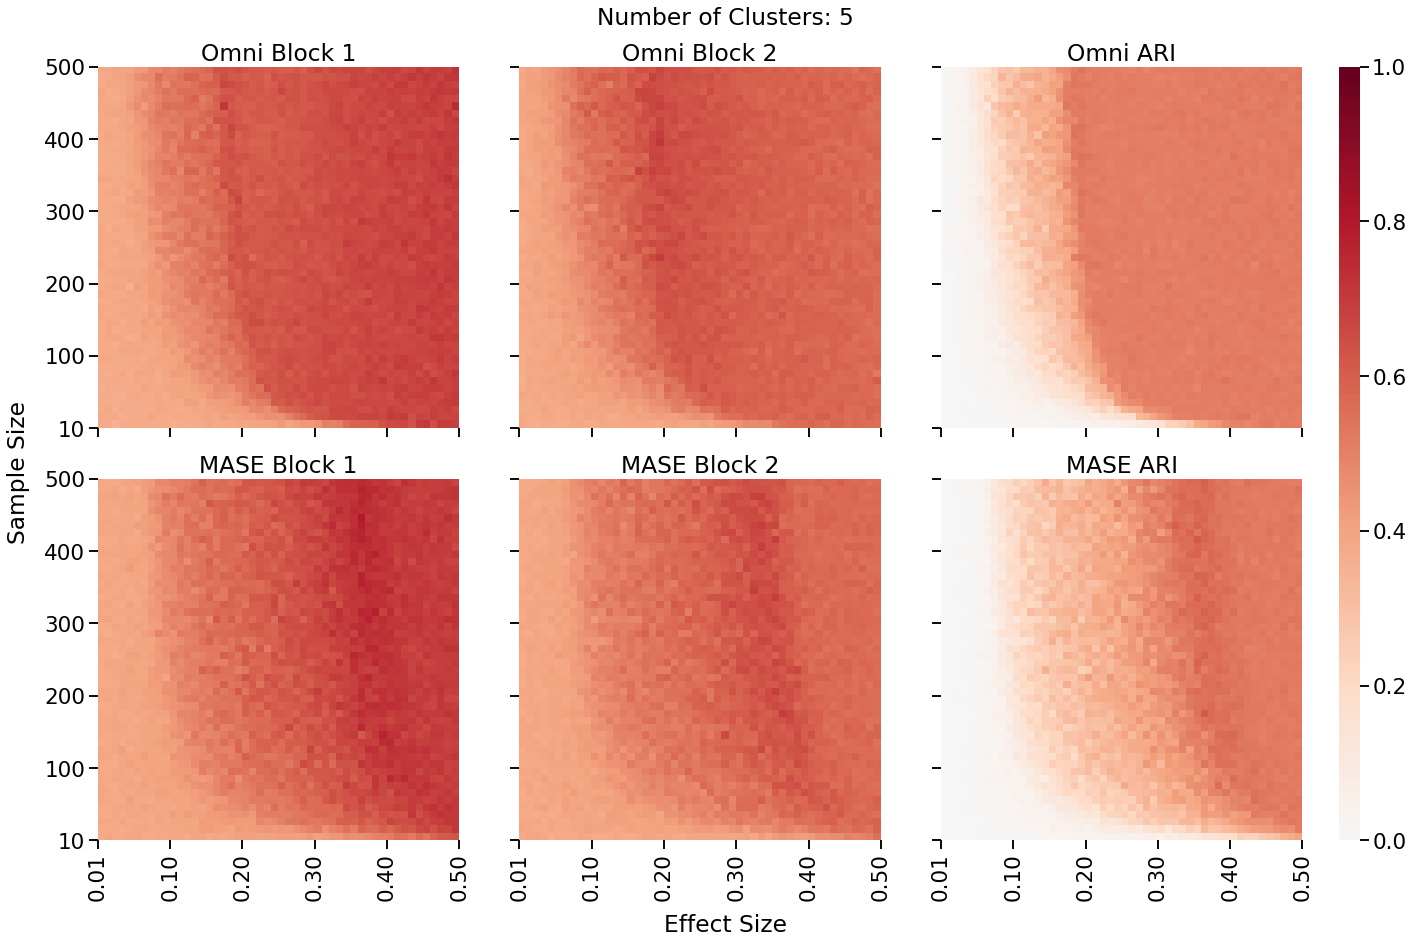

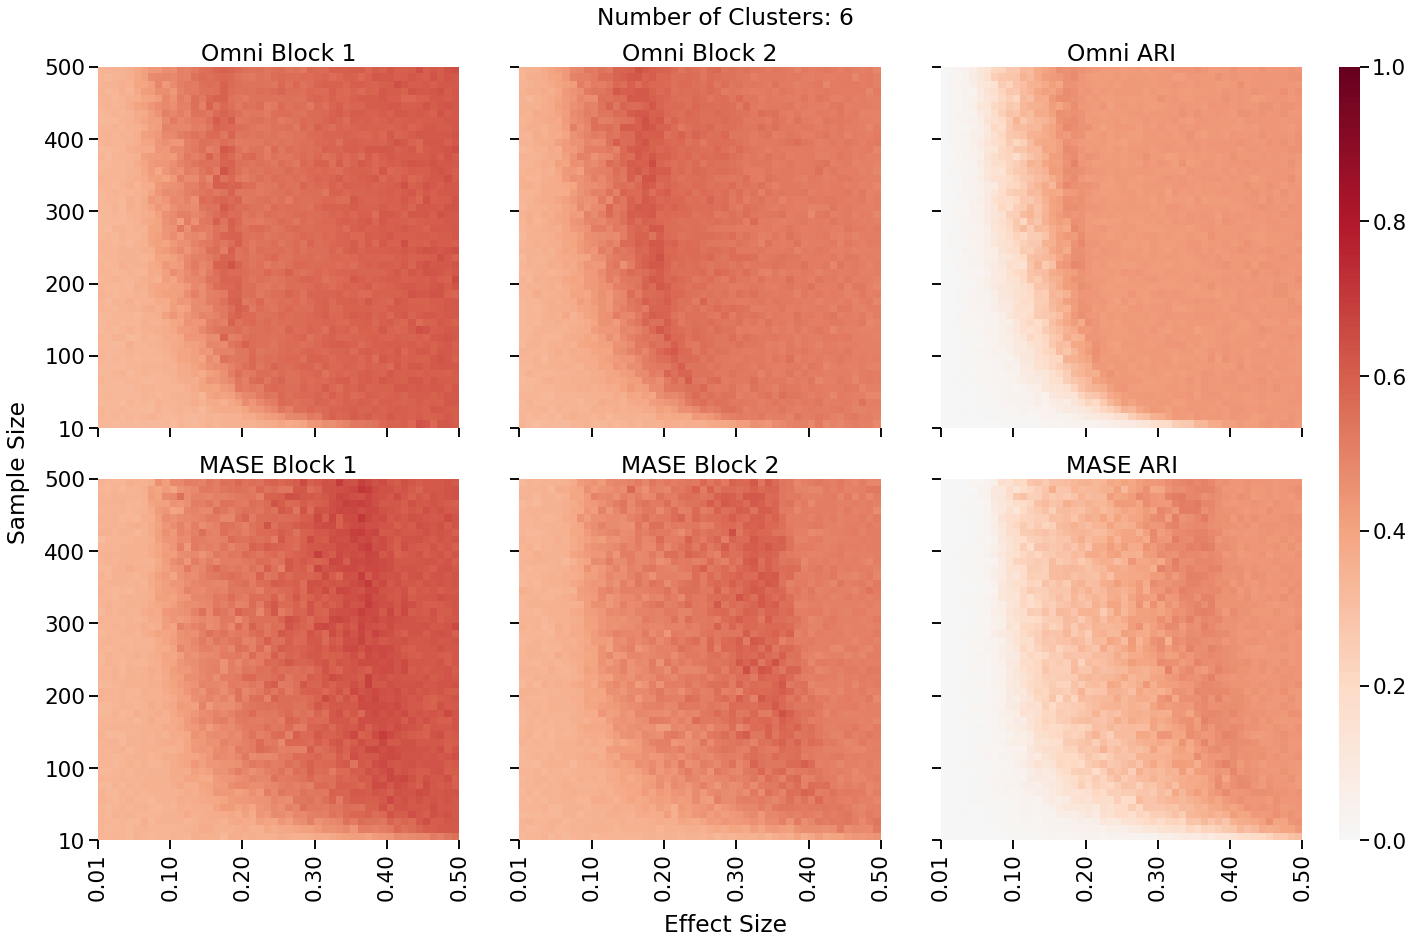

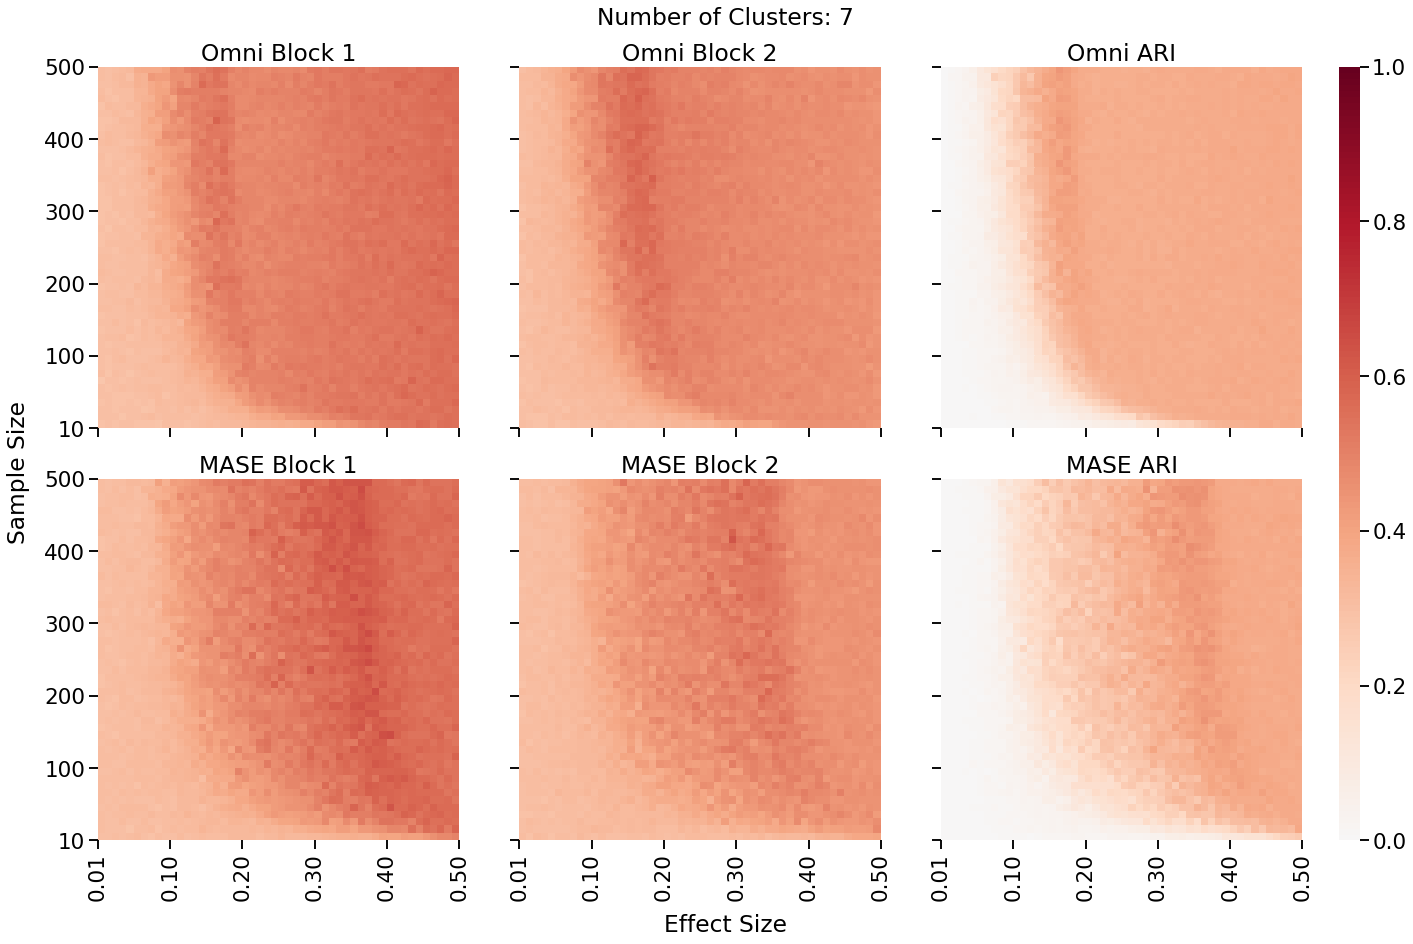

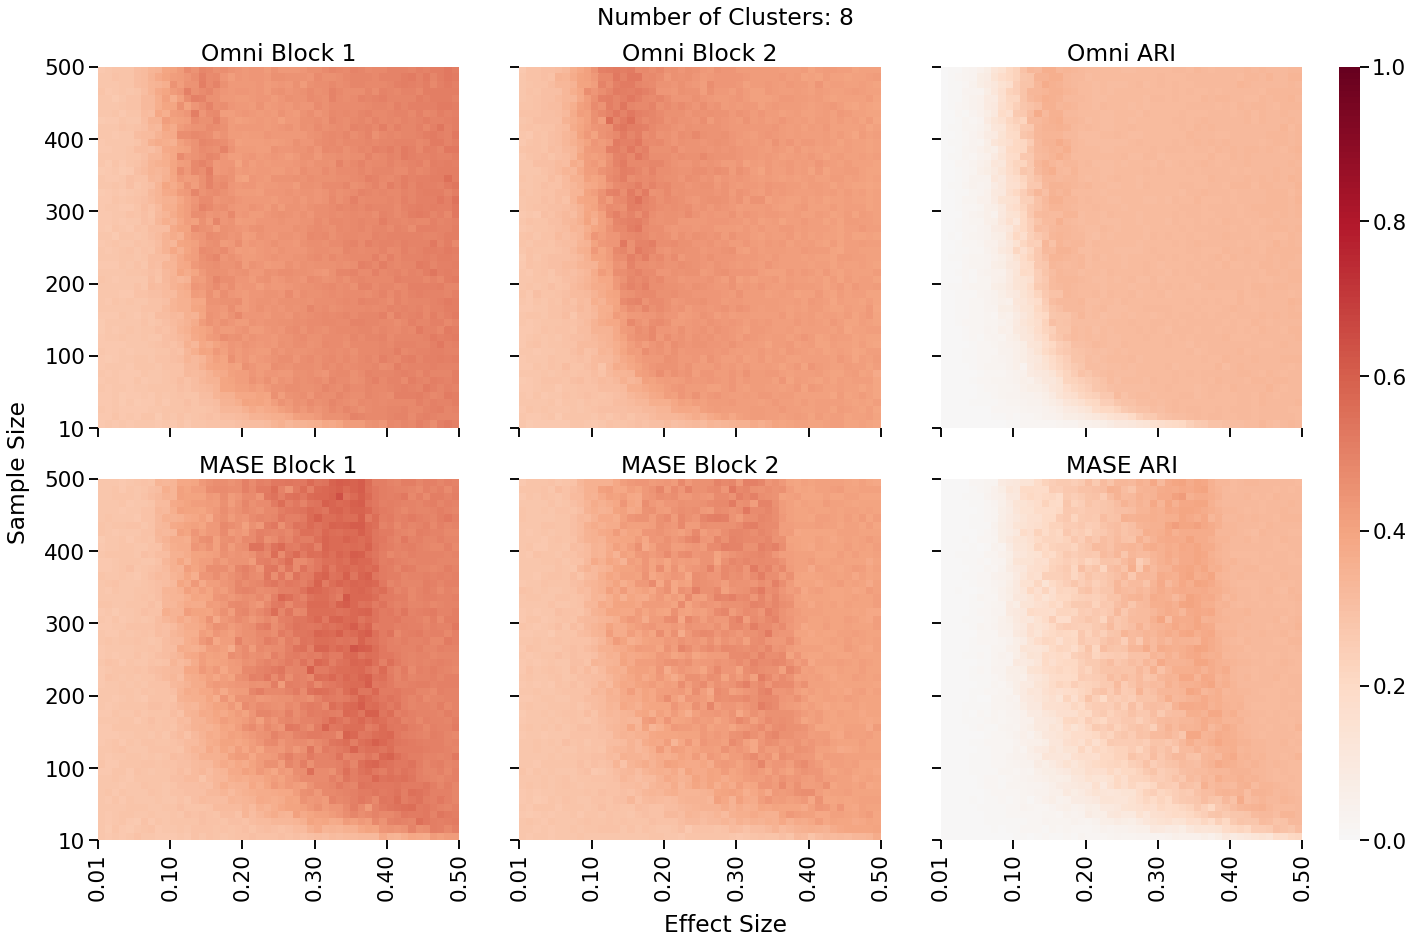

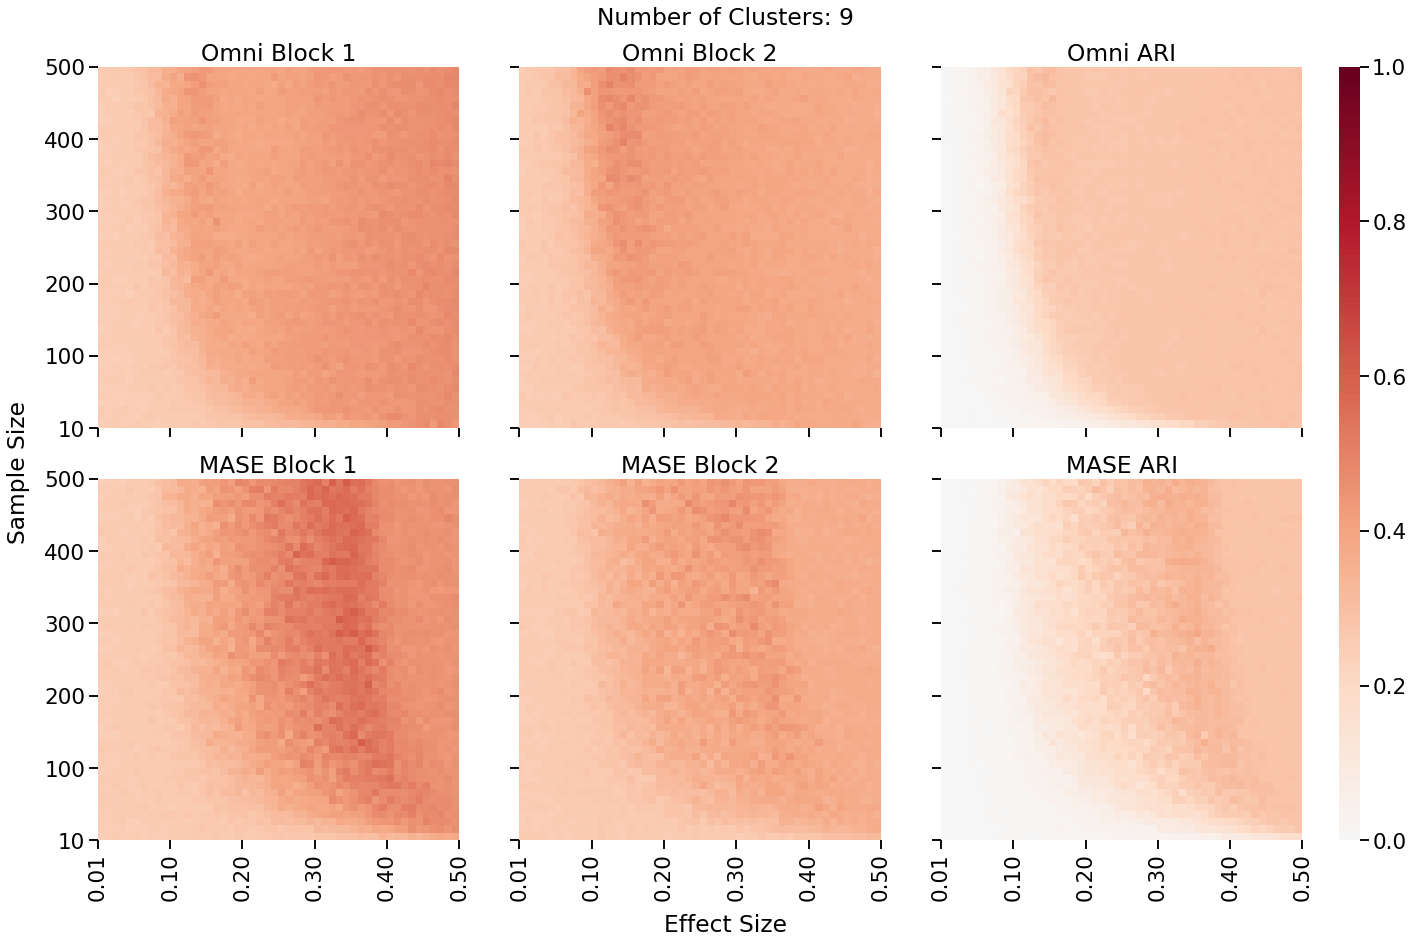

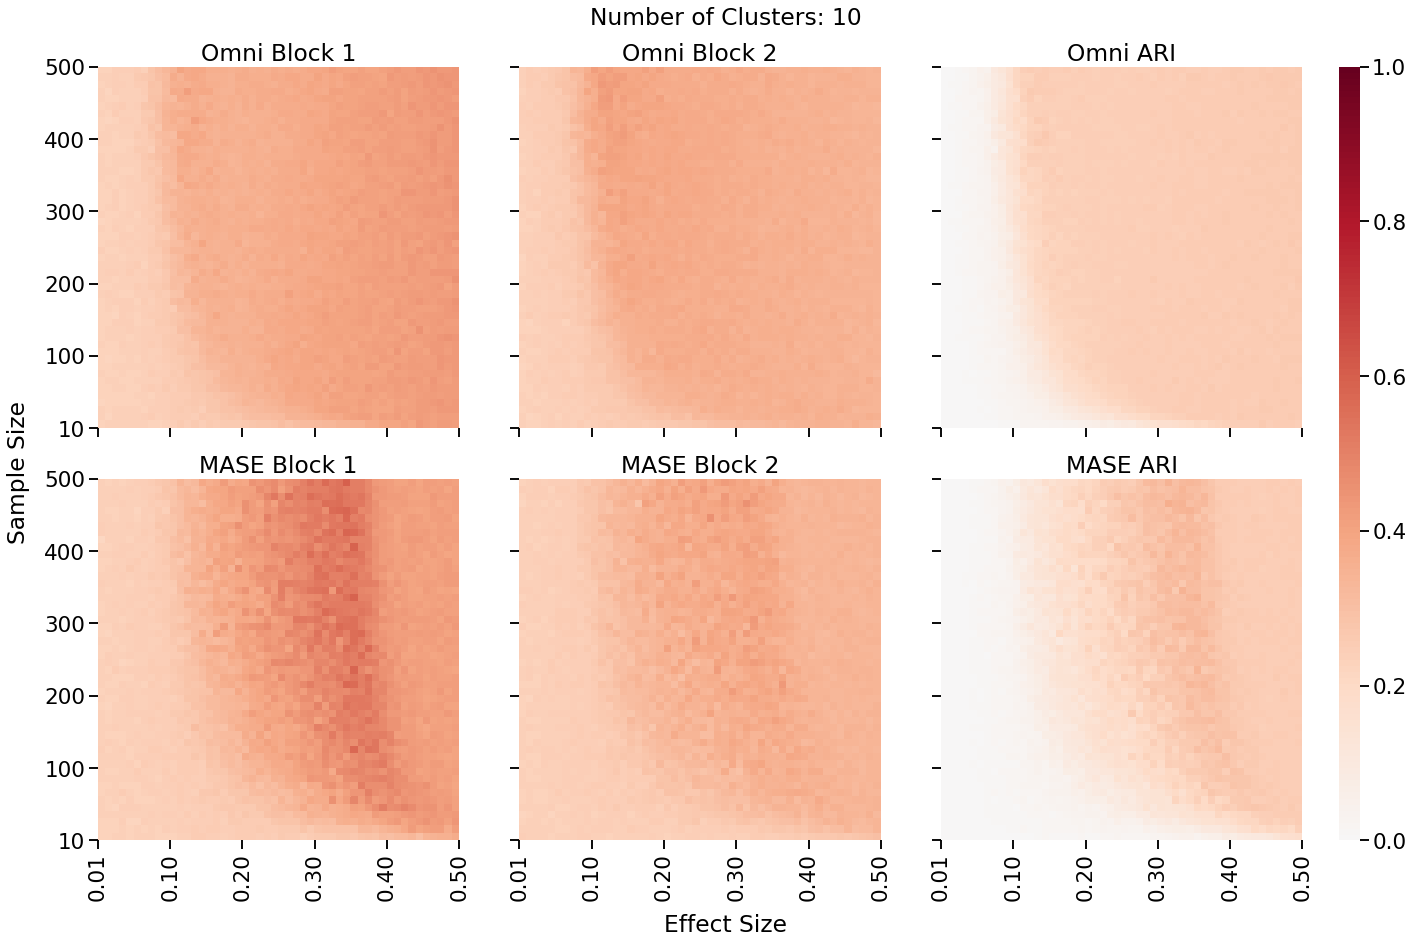

<IPython.core.display.Javascript object>

In [40]:
rows = ["omni", "mase"]
cols = ["_correct_nodes_1_", "_correct_nodes_2_", "_ari_"]

xticklabels = np.linspace(0, 1 - p, spacing + 1)[::10]
xticklabels[0] += 0.01
yticklabels = np.linspace(0, 250, spacing + 1)[::10] * 2
yticklabels[0] += 10


for k in range(2, 11):
    # Make figure with correct subplots
    sns.set_context("talk", font_scale=1.3)
    fig, ax = plt.subplots(
        2,
        4,
        gridspec_kw={"width_ratios": [1, 1, 1, 0.05]},
        figsize=(19, 12),
        sharex=True,
        sharey=True,
        constrained_layout=True,
    )
    gs = ax[-1, -1].get_gridspec()
    for ax_ in ax[:, -1]:
        ax_.remove()
    ax_leg = fig.add_subplot(gs[:, -1])

    for i, method in enumerate(rows):
        for j, metric in enumerate(cols):
            sns.heatmap(
                np.flipud(res_df[f"{method}{metric}{k}"].values.reshape(spacing, -1)),
                ax=ax[i, j],
                square=True,
                center=0,
                cmap="RdBu_r",
                cbar_kws=dict(shrink=0.7),
                xticklabels=["{:.2f}".format(x) for x in xticklabels],
                yticklabels=["{:.0f}".format(y) for y in yticklabels],
                cbar_ax=ax_leg,
                vmin=0,
                vmax=1,
            )
            ax[i, j].set_xticks(np.arange(0, ax[0, 0].get_xlim()[1] + 1, 10))
            ax[i, j].set_yticks(np.arange(0, ax[0, 0].get_ylim()[0] + 1, 10)[::-1])

            if i == 0:
                row_name = "Omni"
            else:
                row_name = "MASE"
            if j == 0:
                col_name = "Block 1"
            elif j == 1:
                col_name = "Block 2"
            else:
                col_name = "ARI"
            ax[i, j].set_title(f"{row_name} {col_name}")

    fig.text(0.5, 1.025, f"Number of Clusters: {k}", va="center", ha="center")
    fig.text(-0.025, 0.5, "Sample Size", va="center", rotation="vertical")
    fig.text(0.5, -0.025, "Effect Size", va="center", ha="center")

    fig.savefig(
        f"./figures/20200213_correct_nodes_k={k}.png", dpi=300, bbox_inches="tight"
    )